## Logistic Regression

Logistic regression, bir classification algoritmasıdır.

Logistic regresison genelde 0 ve 1 sonucu verir. Bu durum binary classification'dır. Mesela kedi ve köpek olmak üzere iki sınıf olması durumunda bu binary classification'dur. Kedi ve Köpek sınıflarını 0 ve 1 şeklinde temsil edebiliriz.

Birde şunu belirtmek gerek ki, veri setindeki veriler birer resim ise bu resimler piksellerden oluşur ve logistic regression modeline resmi öğretebilmek için her bir resimdeki piksel değerlerini bir numpy array'e depolarız. Yani data'yı bir numpy array'e çevirmeliyiz.

### Computation Graph

Computation Graph, matematiksel ifadeleri görselleştirmek için kullandığımız bir yöntemdir.

c = √ a^2 + b^2  

Bu matematiksel ifadenin computation graph ile görselleştirilmiş hali şu şekildedir:

<img src="computation_graph.png" style="width:700px;height:400px"/>

<br><br><br>
Şimdi de logistic regression'un computation graph'ına bakalım.

<img src="log_computation.png" style="width:900px;height:500px"/>

Bir resmi train ettiğimizi düşünelim. Train etmek, resmi modele uyduracağımız anlamına gelir. 

Mavi yuvarlaklar resimdeki her bir pikseli ifade eder. Pikseller, eğer resim bgr ise renk tonlarına göre 0 ile 255 arasında, gri ise renk tonlarına göre 0 ile 1 arasında sayısal değerlerdir. Toplamda 4096 tane piksel bulunmakta. Bu pikselleri, veri setindeki feature'ler yani sütunlar olarak düşünebiliriz.

Her bir pikseli bir ağırlık ile çarpıyoruz. Elde edilen her bir değer toplanır. Sonrasında toplam değerine bir bias değeri eklenir. Bu işlemler sonucunda elde edilen değere şekil üzerinde z denmiştir.

z = b + px1w1 + px2w2 + ... + px4096*w4096

Sonrasında z değerine sigmoid function uygulanıyor. 

Sigmoid function, değeri 0 ile 1 arasında bir değere çeker.

z değerine sigmoid function uygulanması ile tahmin edilen y_head değeri elde edilir ve y_head değeri 0 ile 1 arasında probabilistic değerdir.

Mesela tüm bu işlemlerin ardından 0.9 değerini elde edelim. Threshold değeri 0.5 tir ve 0.5'in üzerindeki değerler 1, 0.5'in altındaki değerler 0 olsun diyoruz. 0.9 değeri 0.5 değerinden büyük olduğuna göre sonuç olarak 1 çıktısı elde edilir. Yani resim üzerindeki işaret 1'dir tahmini sağlanmıştır.

Ayrıca weight ve bias değerleri güncellenmelidir çünkü burada bir resim için eğitim yapılmıştır ve veri setindeki geri kalan her bir resmin eğitimi için w ve b değerleri güncellenmelidir. Bu güncelleme işlemi sigmoid fonksiyonunun türevinin alınması ile yapılır.

Modelde öğrenilen şeyler weight ve bias değerleridir.

Mesela başlangıçta tüm w değerleri 0 ve b değeride 0 olsun. Bu durumda z=0 elde ederiz. 0<0.5 olduğuna göre 0 sonucu elde edilir ama resimdeki işaret 1'dir. Dolayısıyla yanlış tahmin yapılmıştır. Bu durumda geriye doğru gidilir. Sigmoid fonksiyonunun türevi alınır ve türevini alarak bias ile weight değerlerini güncelliyoruz. Sonra diğer resim alınır ve piksel değerleri güncellenmiş weight değerleri ile çapılırarak tüm sonuçlar toplanır ve güncellenmiş bias değeri bu toplamm sonucu ile toplanır sonra bu sonuca sigmoid fonksiyonu uygulanır ve son sonuç elde edilir. Mesela bu sefer de tahmin doğru olsun. Sonrasında tekrar güncelleme işlemleri yapılmalıdır. Tekrar sigmoid fonksiyonunun türevi alınır, sigmoid fonksiyonun geri kalan kısmında gördüğünüz lineer işlemlerin türevi alınır ve weight ve bias güncellenir.

Böylece weight ve bias değerlerini sürekli güncelleyerek tüm resimler eğitilir. En sonunda elde edilen weight ve bias değerleri, tüm resimlere göre eğitilmiş olan logistic regression modelinin katsayıları ve bias değeri oluyor.

### Initializing Parameters

Weight ve bias parametrelerdir. Bu parametrelerin ilk değerlerini seçebilmek için bazı teknikler vardır. Bu teknikleir Deep Learning bölümünde öğreneceğiz. Şimdilik genelde literatürde bu değerlerin kullanılmasından dolayı weight için başlangıç değerini 0.01 olarak ve bias değerini 0 olarak seçelim.

Weight değerini 0 değilde 0.01 seçme sebebimiz, eğer 0 seçseydik weight'ler ve bias öğrenemezdi. Yani sonuca ulaştıktan sonra weight ve bias değerlerinin güncellenmesi için geriye dönüldüğünde weight değerleri 0 olduğunda güncellenecek bir şey olmadığından güncelleme gerçekleşemez.

### Forward Propagation

Pikseller ile cost function arasındaki işlemlerin toplamına Forward Propagation denir. İleriye doğru gitmek şeklinde düşünebiliriz.

z değeri, resmin piksellerinin ağırlıkları ile çarpımı sonucunda tüm değerlerin toplanıp, bu toplam değeri ile de bias değerinin toplanması sonucunda elde edilir. Sonrasında forward propagation devam ediyor ve z değeri sigmoid function içerisine koyularak 0 ile 1 arasında bir değer elde edilir ve sonrasında y_head (probability) değeri elde edilir. 

Sonrasında loss(error) function hesaplanır.

<font color="LightSeaGreen"><br>
LOSS FUNCTION:

<img src="loss.jpg" style="width:400px;height:90px"/>

Loss function matematiksel formülü yukarıda gördüğünüz gibidir.

Gerçek değer ile tahmin edilen değer aynı ise loss değeri 0'dır. Gerçek değer ile tahmin edilen değer farklı ise oldukça büyük bir loss değeri elde edilir. 

Loss = hata = kayıp  ➡️  Bunlar aynı ifadelerdir.

<font color="SandyBrown"><br>
COST FUNCTION: Her bir resim için bir loss function değeri vardır ve bu loss function değerlerinin hepsinin toplamı cost function değeridir. Yani tüm hataların toplamı cost function değeridir. Eğer cost function değeri yüksek ise modelin iyi olduğu söylenemez. Bu durumda weight değerleri yanlıştır ve bu değerlerin güncellenmesi gerekir.

Logistic regression'un computation graph'ında bir resim için forward propagation tamamen gerçekleştirilsin. Yani baştan sona işlemler yapılsın. Sonrasında loss fonksiyonuna elde ettiğimiz y_head değerini (tahmin edilen değer) ve y değerini (ilk baştaki gerçek değer) vererek, loss function değerini elde ederiz.

Bu bir resim için yapılmıştır. Sonrasında aynı şekilde ikinci resim için de loss function değeri elde ederiz ve böylece ikinci resim için de forward propagation'u tamamlamış oluruz. Diğer resimlere de forward propagation yapmalıyız. 

Tüm resimler için forward propagation'u nasıl yapabiliriz? :

Her bir resmi for döngüsü içerisine alarak yapabiliriz fakat for döngüsü çok zaman aldığı için çalışma zamanı açısından kullanışlı bir yöntem değildir.

Bir diğer yöntem ise, bir numpy array'in satırları pikselleri, sütunları resimleri ifade edecek şekilde ayarlarız. Yani bir matrisi bir kerede forward propagation yaparak her bir resim için bir loss değeri elde ederiz. Sonra tüm bu elde edilen loss değerlerini toplayarak bir tane cost değeri elde ederiz. Eğer cost değeri yüksek ise modelin doğru olmadığını anlarız. Bu durumda weight değerlerini ve bias değerini cost function'a göre güncelleriz.

Amaç weight değerlerini ve bias değerini güncelleyerek cost function değerini azaltmaktır.

Weight değerlerini ve bias değerini güncelleme işlemine Backward Propagation denir. Yani en sondan en başa doğru gitmeye Backward Propagation denir.

Gradient Descent algoritmasını kullanarak weight ve bias değerlerini optimize edeceğiz. Yani weight ve bias için cost'a göre en uygun değerleri bulacağız.

### Backward Propagation

Başlangıçta weight ve bias 'a atadığımız değerlerin yanlışlığı sonucunda yüksek bir cost değeri elde ederiz. Bu durumda weight ve bias değerlerini, cost fonksiyonunu azaltacak şekilde güncellemeliyiz. Backward Propagation süreci, cost funciton'dan başlayarak geriye doğru gidilmesi ve weight ve bias değerlerinin güncellenmesidir.

Backward Propagation yaparken kullanılan metod Gradient Descent'tir.

### Optimization Algorithm with Gradient Descent

Cost function değerinin en az olmasını sağlsayan weight ve bias değerlerini bulmalıyız. Yani cost function değerini en az yapacak optimize parametreleri bulmalıyız.

Eğer hataların toplamı çok ise bu yanlış tahmin yapıldığı anlamına gelir. Çünkü hata fonksiyonunu doğru ya da yanlış yaptığımız tahminler oluşturur. Eğer yanlış tahmin yapılmış ise hata değeri yüksek, doğru tahmin yapılmış ise hata değeri düşüktür.

Cost değeri weight ve bias parametrelerinin değerlerine bağlıdır. Dolayısıyla cost değerini azaltmak için weight ve bias değerlerinin güncellenmesi gereklidir.

Model, weight ve bias parametlerini öğrenmeli ve sonucunda bu parametreler cost'u azaltır.

<img src="gradient.png" style="width:800px;height:500px"/>

Yukarıdaki grafiği inceleyelim. bias=0 olarak düşünün. x ekseni weight, y ekseni cost değerini ifade etmekte. Cost fonksiyonunun minimum değeri her zaman 0 olamaz. Ama minimum bir değeri vardır.

Weight değeri 5 iken cost değeri 1.5'tir. Eğer weight değerleri 5 ise forward propagation yaptıktan sonra cost fonskiyonunun değeri 1.5 oluyormuş. Görselde gördüğümüz gibi weight değerini azaltırsak, min cost'a doğru ilerlemiş oluruz.

w := w - step ifadesinin anlamı, w değerlerini güncelle demektir. Weight değerinden step'i çıkararız ve elde edilen yeni değer güncel w değeridir.

Step: weight değeri 5 ve cost değeri 1.5 olan kırmızı çizgi üzerindeki siyah noktanın kestiği line, bu noktanın bu fonksiyona göre eğimidir. Bu eğim step'tir. 

slope1 değeri mesela 3 olsun ve weight değerinin güncellenmesi sonucunda yeni weight değeri 5-3=2 olur. Cost değeri bir önceki adımdaki değere göre daha küçük ama henüz minimum noktada değil. Dolayısıyla bir kere daha forward propagation yapalım. 

Bu sefer cost değeri 0.4 oldu. Fakat yine cost değeri minimum değil. Dolayısıyla bir step daha ilerleriz.

slop22 = 0.7 'dir. 2-0.7=1.3 (w-slope2) elde edilir. Yani yeni weight değerleri 1.3'tür. Ve cost değeri 0.3'tür. Minimum cost değeri budur fakat bu değerin minimum olup olmadığı algoritma tarafından bilinmiyor. Şekilde görebiliyoruz ama gerçekte minimum olup olmadığını bilemeyiz. Dolayısıyla bir kere daha türev alırız.

Slope3=0.01 'dir. 1.3-0.01=1.29  (w-slope3) elde edilir. 1.29 değeri neredeyse 1.3 (w) 'e eşittir. Yani slope3 neredeyse 0 yani burada neredeyse değişim yoktur.

<font color = "DodgerBlue"><br>
Değişim yok ise minimum noktaya ulaşılmış demektir.
    
En son güncellemede weigth değeri değişmedi. Dolayısıyla cost fonksiyonunun minimum noktasını bulmuş olduk.
    
Bir grafiğin bir noktaya göre türevini alırsak, o grafiğin o noktaya göre eğimini bulmuş oluruz.
    
Yani burada cost fonksiyonunun weight'e göre eğimini bulduk. Eğer cost için minimum değerdeysek, eğim (slope) 0 'dır.

<font color = "LimeGreen"><br>    
Bir fonksiyonun bir noktaya göre türevi, o fonksiyonun eğimini verir. Yani minimum cost değerini bulabilmek için o fonksiyonun o noktaya göre türevini sıfıra eşitlemeliyiz. Artık weight değeri değişmiyor ise minimum cost değerine ulaşılmış demektir.
    
Tüm bu işlemler bias içinde aynıdır.

<img src="cost.png" style="width:400px;height:200px"/>

Yukarıdaki formülü açıklayalım. Burada J cost fonksiyonudur. b=0 olduğundan burada cost fonksiyonunun weight'e (w) göre türevinin alınması söyleniyor. Yani aslında bu formül w := w - step ifadesi ile aynıdır.

Formülde α işareti, learning rate 'dir. Learning rate, öğrenme hızı, öğrenme oranı olarak nitelendirilir.

Mesela Paris'teyiz ve Madrid'e gitmek istiyoruz. Bizim hızımız (learning rate) küçüktür. Bu durumda Madrid'e çok yavaş gideriz ve çok uzun zaman alır. Eğer hızımız (learning rate) çok yüksek ise de hiçbir zaman Madrid'e gidemeyebiliriz çünkü kaza yapabiliriz. Bu yüzde hız için (learning rate) en uygun değeri seçmeliyiz.

w ve b güncellenebilen parametrelerdir. α ise hyperparameter'dir. Yani önce α değerini seçeriz ve sonrasında bu değeri değiştirerek ayarlarız.

<font color = "Orange"><br>  
Learning rate değeri çok büyük olmamalı ve çok küçük de olmamalıdır. Learning rate değerini seçmek için denemek zorundayız.
    
Genelde başlangıçta learning rate değeri 0.01 seçilir.

Backward propagation ile geri giderken weight ve bias değerlerini, cost fonksiyonun weight ve bias'a göre türevini alarak güncelleriz. Türevi almak eğimi bulmak demektir. Eğer eğim yüksek ise min cost değerinden uzağız demektir, eğer eğim 0 ise min cost değerindeyiz demektir.

Weight ve bias değerlerini yukarıdaki formüle göre güncelleriz.

<img src="cost_grafik.png" style="width:700px;height:400px"/>

Cost değerinin değişimlerini grafikte görmekteyiz. Cost değeri başlangıçta 14 çıkmış ve sonrasında giderek 0'a yaklaşmış.

Yani backward ve forward'lar arttıkça cost değeri giderek 0'a yaklaşmıştır.

Grafikte gördüğünüz üzere cost değeri 0'a çok yaklaşmış ve artık azalmamaya başlamış dolayısıyla bu noktada durdurulmuştur.

Şimdi de logistic regression algoritmasını uygulayalım.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Kullanacağımız veri seti, bir tümörün iyi huylu mu, kötü huylu mu olduğunu göstermektedir.

diagnosis sütununda yer alan M değerleri kötü huylu tümörü, B değerleri de iyi huylu tümörü ifade etmektedir.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

569 tane sample bulunmaktadır. Bu sample'ler DataFrame içerisinde bulunuyor. diagnosis sütunu class'tır ve iyi huylu, kötü huylu tümör şeklinde iki kategoriye sahiptir.

Veri setini eğitirken, logistic regression modelini oluştururken bazı feature'leri kullanmayacağız. Mesela Unnamed: 32 isimli feature nan değerlerden oluşmakta dolayısıyla bu feature'yi kullanmayız. id isimli sütunu da kullanmayız çünkü bu sütunlar veri setini sınıflandırma konusunda bir etkiye sahip değillerdir. Tümörün yarıçapı ya da dokusu gibi özellikleri olmadığı için bu sütunları drop ederiz.

In [5]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)

Yukarıdaki kod ile "Unnamed: 32","id" sütunlarını veri setinden çıkarıyoruz. 

axis=1 parametresi ile tüm bir sütunun drop edilmesini sağlıyoruz. axis=0 olsaydı satırın drop edilmesi sağlanırdı. 

inplace=True parametresi ile kaldırma işleminin kalıcı olması sağlanmıştır. Yani data değişkeninde tutulan veri setinin içerisinden data.drop "Unnamed: 32" ve "id" sütunları kalıcı olarak çıkarılmıştır.

Artık veri setinde class'ımız olan diagnosis feature'si ve tümörü ayırt etmek için kullanacağımız sayısal feature'ler bulunmaktadır.

Şimdi diagnosis sütunundaki M ve B değerlerini 0 ve 1 şeklinde int değerlere dönüştürelim. Çünkü sınıflandırma işleminde bu feature'yi kullanabilmemiz için string tipinde değil, categorical ya da int tipinde değerlere sahip olmalı.

In [6]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]

In [7]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Böylece diagnosis feature'si artık int tipindedir.

İki tane class'a sahibiz. Birinci class iyi huylu tümör, ikinci class kötü huylu tömürdür.

diagnosis feataure'sinde bulunan 1 değerleri tümörün kötü huylu olduğunu, 0 değerleri tümörün iyi huylu olduğunu ifade etmektedir.

In [9]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

.values ile numpy array'e çevirme işlemi yapılır.

diagnosis feature'si çıktı değerimiz olucak. Dolayısıyla y isimli değişkene atadık.

diagnosis dışındaki tüm feature'ler x ekseni olucak.

In [10]:
max(data["area_mean"])

2501.0

Mesela area_mean sütununun maksimum değeri 2501 'dir. Eğer area_mean feature'sini normalize etmezsek, bu feature diğer feature'lere üstünlük sağlayabilir. Mesela smoothness_se featuresindeki değerler 0.008166 gibi çok küçük değerler. Dolayısıyla area_mean feature'si smoothness_se feature'sinin ihmal edilmesine sebep olabilir. smoothness_se feature'sinin özelliğini kaybetmesine sebep olabilir. Dolayısıyla tüm feature'leri normalize etmeliyiz.

Normalize işlemi, değerleri 0 ile 1 arasında ölçeklendirmek demektir.

Tüm feature'lerin değerlerini 0 ile 1 aralığına çekerek feature'ler arasında modeli bozan farkların kaldırılmasını sağlamış olucaz.

<font color="SlateBlue"><br>
Normalization : (x - min(x)) / (max(x) - min(x))

In [11]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [12]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Görüldüğü üzere tüm değerler 0 ile 1 aralığına çekilmiştir.

Böylelikle normalize işlemi ile feature'lerin birbirine üstünlük sağlamaları engellenmiştir.

Veri setini logistic regression algoritması ile eğiteceğiz. Ve sonucunda matematiksel bir denklem elde edilir. Bu denkleme de model denir. Bu model ile tümörün iyi huylu mu kötü huylu mu olduğu tahmin edilecek. Bu modeli test edeceğimiz data olmalı. Data içerisinde 529 tane sample var. Bu data'nın %80'ini train seti yapalım yani modeli eğiteceğimiz veri seti olsun. Veri setinin geri kalan %20'si ile de modeli test edelim. Dolayısıyla elimizdeki veri setini %80'i train, %20'side test seti olacak şekilde bölüyoruz.

Veri setinin %80'lik kısmı ile eğitim gerçekleştirip modeli elde edeceğiz. Veri setinin %20'lik kısmını modele vererek iyi huylu tümör veya kötü huylu tümör şeklinde sonuçlar elde edeceğiz. Sonrasında bu sonuçların doğru olup olmadığını gerçek değerler ile kıyaslayarak anlayabiliriz. Dolayısıyla oluşturduğumuz modelin güvenilirliğini, doğruluğunu test data'sı ile anlayabiliriz.

Şimdi veri setini train ve test şeklinde ayıran kodu yazalım.

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

y class'ın label değerleridir. x ise class'ın feature'leridir. train_test_split metoduna x ve y'yi veriyoruz ve test_size=0.2 parametresi ile x ve y'nin %20'sinin test, %80'inin train seti olması sağlanır.

x'in %80'i x_train ve x'in %20'si x_test olur. y'nin %80'i y_train ve y'nin %20'si y_test olur. 

Her çalıştırmada train ve test setlerine verilerin dağılımlarının farklı olmaması için random_state=42 parametresi kullanılmıştır. test ve train setlerine veriler bölünürken rastgele seçilerek dağıtıldığı için kodu her çalıştırmamızda farklı doğruluk değeri elde edebiliriz. Bunu önlemek içinde random_state parametresini kullanırız. Bu parametre sayesinde kodu her çalıştırmamızda train ve test içeriği bir önceki çalıştırmamızdaki içerikleri ile aynı olur.

Şimdi veri setinde satır ve sütunların yerlerini değiştirelim. Logistic regression'u anlatırken bu şekilde anlattığımız için bu işlemi yapıyoruz. Ayrıyeten bir amaç yoktur.

In [14]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (30, 455)
x_test:  (30, 114)
y_train:  (455,)
y_test:  (114,)


### Implementing Initializing Parameters and Sigmoid Function

30 tane feature bulunmaktadır. Bu feature'leri weight değerleri ile çarpıyoruz ve her bir sonucu topluyoruz. Sonra da bu toplam sonucu ile bias değerini topluyoruz. weight ve bias 'ın başlangıç değerlerini rastgele belirliyorduk. Bu anlatılanların kodunu yazalım.

Ayrıca w değeri 0 olursa, öğrenme gerçekleşemez. Genellikle weight'in başlangıç değeri 0.01 olarak seçilir.

In [15]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

30 tane feature değeri olduğuna göre 30 tane weight değeri olmalıdır. Dolayısıyla dimesion=30 olur.

w = np.full((dimension,1),0.01)

Bu satır ile, satır sayısı dimension kadar yani 30 tane ve sütun sayısı 1 olan 0.01 değerlerinden oluşan bir matris oluşturdum.

<font color="SeaGreen"><br>
Sigmoid function: 

<img src="sigmoid.png" style="width:400px;height:200px"/>

Yukarıda gördüğünüz sigmoid function formülüdür. Burada x değeri, z değeridir. Hatırlarsanız z değerini, feature'leri weight değerleri ile çarpıyoruz ve her bir sonucu topluyoruz ve sonra da bu toplam sonucu ile bias değerini toplayarak elde ediyoruz.

In [16]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

np.exp(-z) metodu e^(-z) ifadesini sağlar.

### Implementing Forward and Backward Propagation

<font color="LimeGreen">
Forward and Backward Propagation:

In [17]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

Hatırlatma: Matris çarpımı kuralı, ilk matrisin sütun boyutu ile ikinci matrisin satır boyutu aynı olmalıdır.

derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  

Bu satırda weight'in türevi alınarak değeri güncellenmiştir. 

derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]

Bu satırda bias'in türevi alınarak değeri güncellenmiştir. 

backward propagation ile weight ve bias değerleri güncellenerek minimum cost değerine ulaşmak amaçlanmıştır.

Yukarıda weight ve bias değerlerini ne kadar güncelleyeceğimizi return ettirdik. Şimdi de weight ve bias'ı güncelleyelim.

In [18]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

Weight ve bias'ı güncellemek aslında modeli train etmektir yani eğitmektir. 

### Implementing Prediction

In [19]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Label'ı olmayan yani iyi huylu mu kötü huylu mu tümör olduğunu bilmediğimiz sample'ler için tahminler gerçekleştirilmiştir.

Y_prediction değişkeninde yapılan tahminler tutulmaktadır. Şimdi bu tahminlerin doğruluğunu anlayabileceğimiz kodu yazalım.

Cost after iteration 0: 0.692977
Cost after iteration 10: 0.499667
Cost after iteration 20: 0.406616
Cost after iteration 30: 0.351936
Cost after iteration 40: 0.315762
Cost after iteration 50: 0.289862
Cost after iteration 60: 0.270257
Cost after iteration 70: 0.254795
Cost after iteration 80: 0.242214
Cost after iteration 90: 0.231722
Cost after iteration 100: 0.222796
Cost after iteration 110: 0.215080
Cost after iteration 120: 0.208317
Cost after iteration 130: 0.202324
Cost after iteration 140: 0.196961
Cost after iteration 150: 0.192121
Cost after iteration 160: 0.187722
Cost after iteration 170: 0.183698
Cost after iteration 180: 0.179997
Cost after iteration 190: 0.176577
Cost after iteration 200: 0.173402
Cost after iteration 210: 0.170443
Cost after iteration 220: 0.167676
Cost after iteration 230: 0.165080
Cost after iteration 240: 0.162638
Cost after iteration 250: 0.160334
Cost after iteration 260: 0.158155
Cost after iteration 270: 0.156091
Cost after iteration 280: 0.154

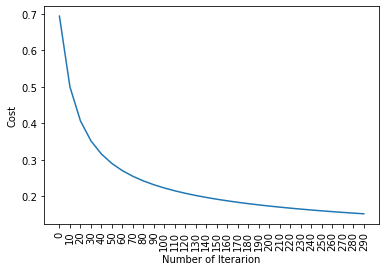

test accuracy: 96.49122807017544 %


In [20]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)

learning rate, num_iterations parametreleri hyperparameter'dir. Bu parametrelere farklı değerler vererek, modele göre uygun değeri seçeriz. Bu parametreler için farklı değerleri bir for döngüsü ile deneyerek, en yüksek accuracy değerini veren parametre değerlerini bulabiliriz.

Sklearn ile logistic regression'u bir kaç satırda yazabilmemiz mümkün.

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train.T,y_train.T)

print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.9824561403508771


score() metodu ile tahmin gerçekleştirilip sonrasında accuracy değeri yani tahminlerinin ne kadarının doğru olduğuna dair oran elde edilir.

<font color="GoldenRod"><br>
Logistic regression'u iki tane seçeneğe sahip class olması durumunda kullanabiliriz. Yani binary bir output'a sahip olmalıdır.